# Step 0: Data Preparation

In [1]:
import numpy
import pandas

data = pandas.DataFrame(pandas.read_csv("./data/StudentsPerformance.csv"))

headers = list(data.columns)
for header in headers:
    data[header] = pandas.factorize(data[header])[0] if data[header].dtypes == 'object' else data[header]
 
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,0,0,0,0,72,72,74
1,0,1,1,0,1,69,90,88
2,0,0,2,0,0,90,95,93
3,1,2,3,1,0,47,57,44
4,1,1,1,0,0,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,2,0,1,88,99,95
996,1,1,4,1,0,62,55,55
997,0,1,4,1,1,59,71,65
998,0,3,1,0,1,68,78,77


# Step 2: Dimensionality Reduction

In [2]:
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AffinityPropagation

def discend(input_data: pandas.DataFrame, method: str) -> pandas.DataFrame:
    scaled_data = StandardScaler().fit_transform(input_data)
    reduced_data = eval(method)(n_components=2).fit_transform(scaled_data) 
    return pandas.DataFrame(reduced_data, columns=["X", "Y"])

def cluster(input_data: pandas.DataFrame) -> pandas.DataFrame:
    return AffinityPropagation(max_iter=1000,).fit(input_data).labels_

def dimensionality_reduction(input_data: pandas.DataFrame, method: str):
    discend_data = discend(input_data, method)
    discend_data["label"] = cluster(discend_data)
    discend_data.to_csv("./data/"+method+".csv")

for method in ["PCA", "TSNE", "MDS"]:
    dimensionality_reduction(data, method)


# Step 3: Visualization

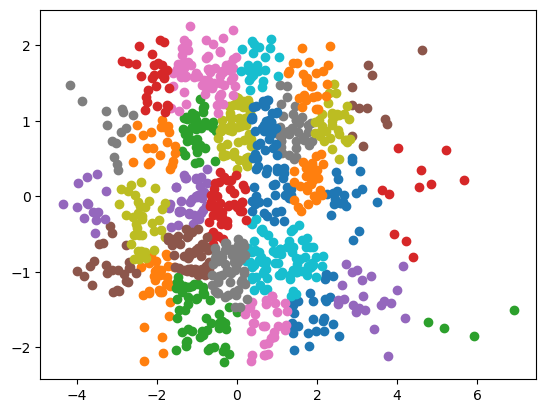

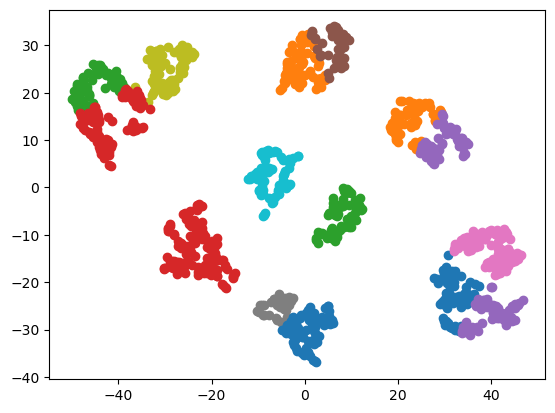

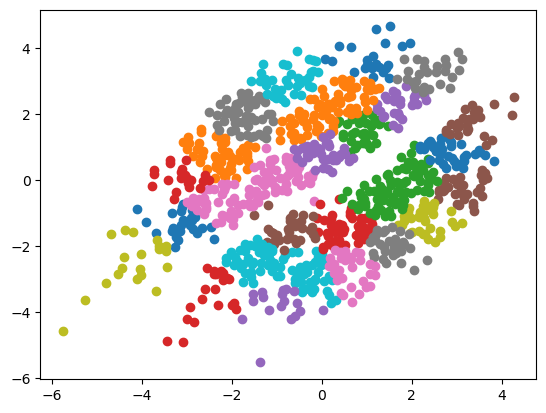

In [6]:
import matplotlib.pyplot as plt

for method in ["PCA", "TSNE", "MDS"]:
    output_data = pandas.read_csv("./data/"+method+".csv")
    _, ax = plt.subplots()
    for name, group in output_data.groupby('label'):
        ax.scatter(group['X'], group['Y'], label=name)
    plt.show()